In [1]:
print('hello')

hello


<h1>Web Scraping</h1>

In [2]:
import requests
from bs4 import BeautifulSoup

requests_results = requests.get('https://en.wikipedia.org/wiki/ChatGPT')

In [3]:
wiki_page = BeautifulSoup(requests_results.text, 'html.parser')

In [5]:
for paragraph in wiki_page.select('p'):
    print(paragraph.getText())



ChatGPT is a generative artificial intelligence chatbot developed by OpenAI and launched in 2022. It is currently based on the GPT-4o large language model (LLM). ChatGPT can generate human-like conversational responses and enables users to refine and steer a conversation towards a desired length, format, style, level of detail, and language.[2] It is credited with accelerating the AI boom, which has led to ongoing rapid investment in and public attention to the field of artificial intelligence (AI).[3] Some observers have raised concern about the potential of ChatGPT and similar programs to displace human intelligence, enable plagiarism, or fuel misinformation.[4][5]

ChatGPT is built on OpenAI's proprietary series of generative pre-trained transformer (GPT) models and is fine-tuned for conversational applications using a combination of supervised learning and reinforcement learning from human feedback.[4] Successive user prompts and replies are considered at each conversation stage 

In [6]:
with open("chatgpt_wikipedia.txt", "w", encoding="utf-8") as file:
    for paragraph in wiki_page.select('p'):
        file.write(paragraph.getText() + "\n\n")

<h1>Text preprocessing</h1>

<h2>Import file and library</h2>

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer
from collections import Counter
import spacy


In [33]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 5.6 MB/s eta 0:00:03
     ---------- ----------------------------- 3.4/12.8 MB 9.6 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 MB 10.4 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 10.8 MB/s eta 0:00:01
     -------------------------------- ------ 10.7/12.8 MB 11.2 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 11.3 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 10.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
nlp = spacy.load("en_core_web_sm")

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
with open("chatgpt_wikipedia.txt", "r", encoding="utf-8") as file:
    text = file.read()

<h2>Tokenize</h2>

In [10]:
tokens = word_tokenize(text)
print("Tokenized Words:", tokens)  # Show sample tokens

Tokenized Words: ['ChatGPT', 'is', 'a', 'generative', 'artificial', 'intelligence', 'chatbot', 'developed', 'by', 'OpenAI', 'and', 'launched', 'in', '2022', '.', 'It', 'is', 'currently', 'based', 'on', 'the', 'GPT-4o', 'large', 'language', 'model', '(', 'LLM', ')', '.', 'ChatGPT', 'can', 'generate', 'human-like', 'conversational', 'responses', 'and', 'enables', 'users', 'to', 'refine', 'and', 'steer', 'a', 'conversation', 'towards', 'a', 'desired', 'length', ',', 'format', ',', 'style', ',', 'level', 'of', 'detail', ',', 'and', 'language', '.', '[', '2', ']', 'It', 'is', 'credited', 'with', 'accelerating', 'the', 'AI', 'boom', ',', 'which', 'has', 'led', 'to', 'ongoing', 'rapid', 'investment', 'in', 'and', 'public', 'attention', 'to', 'the', 'field', 'of', 'artificial', 'intelligence', '(', 'AI', ')', '.', '[', '3', ']', 'Some', 'observers', 'have', 'raised', 'concern', 'about', 'the', 'potential', 'of', 'ChatGPT', 'and', 'similar', 'programs', 'to', 'displace', 'human', 'intelligence'

<h2>Casefold</h2>

In [11]:
tokens = [word.lower() for word in tokens]
print("casefolded Words:", tokens)  # Show sample tokens

casefolded Words: ['chatgpt', 'is', 'a', 'generative', 'artificial', 'intelligence', 'chatbot', 'developed', 'by', 'openai', 'and', 'launched', 'in', '2022', '.', 'it', 'is', 'currently', 'based', 'on', 'the', 'gpt-4o', 'large', 'language', 'model', '(', 'llm', ')', '.', 'chatgpt', 'can', 'generate', 'human-like', 'conversational', 'responses', 'and', 'enables', 'users', 'to', 'refine', 'and', 'steer', 'a', 'conversation', 'towards', 'a', 'desired', 'length', ',', 'format', ',', 'style', ',', 'level', 'of', 'detail', ',', 'and', 'language', '.', '[', '2', ']', 'it', 'is', 'credited', 'with', 'accelerating', 'the', 'ai', 'boom', ',', 'which', 'has', 'led', 'to', 'ongoing', 'rapid', 'investment', 'in', 'and', 'public', 'attention', 'to', 'the', 'field', 'of', 'artificial', 'intelligence', '(', 'ai', ')', '.', '[', '3', ']', 'some', 'observers', 'have', 'raised', 'concern', 'about', 'the', 'potential', 'of', 'chatgpt', 'and', 'similar', 'programs', 'to', 'displace', 'human', 'intelligence

<h2>Remove Stopwords</h2>

In [18]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

print('the english stopwords in NLTK are\n', stop_words)
print('/n')
print("Filtered Words (Stopwords Removed):/n", filtered_tokens)

the english stopwords in NLTK are
 {'but', 'should', 'that', 'has', "she'd", "mightn't", 'or', 'they', 'hadn', 'who', 'them', 'weren', 'hasn', "you've", 'her', 'itself', 'which', 'yourselves', 'very', 'herself', 'd', 'again', 'where', "don't", "doesn't", 'out', "haven't", 'yours', "we're", 'their', "hadn't", "he'll", 'our', 'are', "i've", "it'll", "couldn't", 'having', 'he', 'm', "wouldn't", 'as', 'mightn', 'you', 'shouldn', 'whom', 'y', 'won', 'mustn', 'o', 'then', 'it', 'isn', 'own', "i'll", "we've", "they'll", 'about', 'were', 'doing', 'from', "should've", 'shan', "won't", "aren't", "weren't", 't', 'll', "wasn't", 'a', "she'll", 'don', 'up', 'does', 'hers', 'just', 'only', 'being', 'himself', 'myself', 'than', 'against', 'wouldn', 'ma', 'off', 'him', 'under', 'she', 'any', 'those', 'after', 'more', 're', "it's", 'during', 'my', "it'd", 'to', "he's", 'aren', 'this', 'is', 'below', 'ours', 'i', 'had', 'be', 'no', 'needn', 'once', 'can', "isn't", "they're", 'yourself', 'how', 'now', 'd

<h2>Stemming</h2>

In [22]:
# stemmer = PorterStemmer()
lancaster = LancasterStemmer()
stemmed_tokens = [lancaster.stem(word) for word in filtered_tokens]
print("Stemmed Words:", stemmed_tokens)

Stemmed Words: ['chatgpt', 'gen', 'art', 'intellig', 'chatbot', 'develop', 'opena', 'launch', '2022', 'cur', 'bas', 'larg', 'langu', 'model', 'llm', 'chatgpt', 'gen', 'convers', 'respons', 'en', 'us', 'refin', 'ste', 'convers', 'toward', 'desir', 'leng', 'form', 'styl', 'level', 'detail', 'langu', '2', 'credit', 'accel', 'ai', 'boom', 'led', 'ongo', 'rapid', 'invest', 'publ', 'at', 'field', 'art', 'intellig', 'ai', '3', 'observ', 'rais', 'concern', 'pot', 'chatgpt', 'simil', 'program', 'displac', 'hum', 'intellig', 'en', 'plagi', 'fuel', 'misinform', '4', '5', 'chatgpt', 'built', 'opena', 'propriet', 'sery', 'gen', 'transform', 'gpt', 'model', 'convers', 'apply', 'us', 'combin', 'superv', 'learn', 'reinforc', 'learn', 'hum', 'feedback', '4', 'success', 'us', 'prompt', 'reply', 'consid', 'convers', 'stag', 'context', '6', 'chatgpt', 'releas', 'fre', 'avail', 'research', 'preview', 'due', 'popul', 'opena', 'op', 'serv', 'freem', 'model', 'us', 'fre', 'tier', 'access', 'chatgpt', 'plu', '

<h2>Lemmatizing</h2>

In [35]:
# lemmatizer = WordNetLemmatizer()
doc = nlp(" ".join(filtered_tokens))
lemmatized_tokens = [token.lemma_ for token in doc if token.is_alpha]
# lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("Lemmatized Words:", lemmatized_tokens)

Lemmatized Words: ['chatgpt', 'generative', 'artificial', 'intelligence', 'chatbot', 'develop', 'openai', 'launch', 'currently', 'base', 'large', 'language', 'model', 'llm', 'chatgpt', 'generate', 'conversational', 'response', 'enable', 'user', 'refine', 'steer', 'conversation', 'towards', 'desire', 'length', 'format', 'style', 'level', 'detail', 'language', 'credit', 'accelerate', 'ai', 'boom', 'lead', 'ongoing', 'rapid', 'investment', 'public', 'attention', 'field', 'artificial', 'intelligence', 'ai', 'observer', 'raise', 'concern', 'potential', 'chatgpt', 'similar', 'program', 'displace', 'human', 'intelligence', 'enable', 'plagiarism', 'fuel', 'misinformation', 'chatgpt', 'build', 'openai', 'proprietary', 'series', 'generative', 'transformer', 'gpt', 'model', 'conversational', 'application', 'use', 'combination', 'supervise', 'learn', 'reinforcement', 'learn', 'human', 'feedback', 'successive', 'user', 'prompt', 'reply', 'consider', 'conversation', 'stage', 'context', 'chatgpt', 'r

In [24]:
bow = Counter(filtered_tokens)
print("Most Common Words in Bag of Words:", bow.most_common(10))

Most Common Words in Bag of Words: [('chatgpt', 192), ('openai', 75), ('2023', 69), ('ai', 57), ('users', 31), ('2024', 24), ('used', 23), ('model', 22), ('could', 22), ('one', 21)]


<h2>Feature extraction</h2>

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([" ".join(lemmatized_tokens)])
print(vectorizer.get_feature_names_out())

['ability' 'able' 'abstract' ... 'youth' 'zapi' '百模大战']


C:\Users\Asus\AppData\Local\Temp\ipykernel_13948\3273591859.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette="viridis")


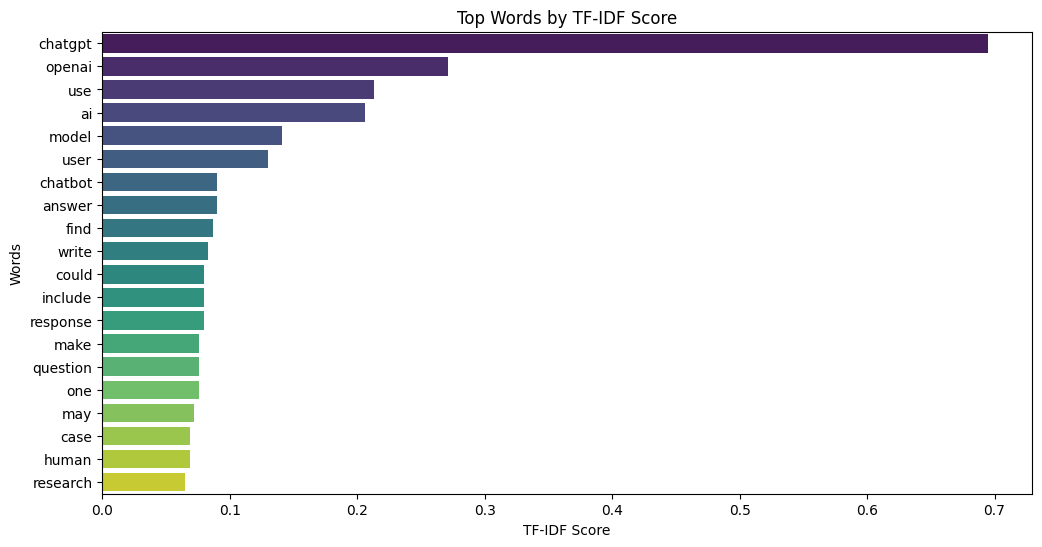

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([" ".join(lemmatized_tokens)])

# Get feature names and their corresponding TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()

# Sort words by importance
sorted_indices = np.argsort(tfidf_scores)[::-1]  # Sort in descending order
top_n = 20  # Choose how many words to visualize
top_features = [feature_names[i] for i in sorted_indices[:top_n]]
top_scores = [tfidf_scores[i] for i in sorted_indices[:top_n]]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scores, y=top_features, palette="viridis")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title("Top Words by TF-IDF Score")
plt.show()
